# We will be creating a simple Quantum Program and running it on a QPU and then scale it for larger programs for utiliy

## Hello World example on a 2 quibit bell state

In [1]:
# Quantum Computational workflows
"""
1. Map the problem to circuits and operators (quantum native format)
2. Optimize the process(circuits and operators)
3. Execute it on a backend a quantum primitive function
4. Post process or analyze the result 
"""

'\n1. Map the problem to circuits and operators (quantum native format)\n2. Optimize the process(circuits and operators)\n3. Execute it on a backend a quantum primitive function\n4. Post process or analyze the result \n'

# Step 1 Map the problem to circuits and operators


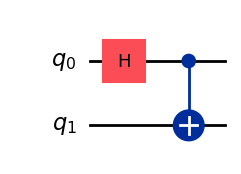

In [1]:
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator

qc = QuantumCircuit(2) # this creates two quibits

# Hardamard gate
qc.h(0) # This makes quibit 0 in quantum superposition 

# Controlled not 
qc.cx(0, 1) # This causes both quibit 0 and 1 to be entagled and 

qc.draw('mpl')

When working with quntum circuits you need to think of what data you want
to be returned is it;
1. A probability distribution for a set of quibits you wish to measure
2. The expectation value of the observable
 

In [2]:
from qiskit.quantum_info import SparsePauliOp
observable_label = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']
observable = [SparsePauliOp(label) for label in observable_label]
observable

[SparsePauliOp(['IZ'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['IX'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['ZI'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['XI'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['ZZ'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['XX'],
               coeffs=[1.+0.j])]

In [7]:
# Step 2 optimize the process (circuits and operators)
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()

backend = service.least_busy(simulator=False, operational=True)

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

isa_circquit = pm.run(qc)

isa_circquit.draw('mpl', idle_wires=False)

RequestsApiError: "HTTPSConnectionPool(host='auth.quantum-computing.ibm.com', port=443): Max retries exceeded with url: /api/version (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000002B56322B050>, 'Connection to auth.quantum-computing.ibm.com timed out. (connect timeout=5.0)'))"

# Executing using quantum primitives

In [6]:
from qiskit_ibm_runtime import EstimatorV2
estimator = EstimatorV2(mode=backend)
estimator.options.resilience_level = 1
estimator.options.defaults_shots = 5000
mapped_observables = [
    observable.apply_layout(isa_circquit.layout) for observables in mapped_observables
]
job = estimator.run([(isa_cirquit, mapped_observables)])

print(f'>>> Job ID: {job.job_id}')

NameError: name 'backend' is not defined

In [ ]:
# The result of the entire submission
# One inner result and some meta data
job_result = job.result()
# This contains information on all six
pub_result job.result()[0]

In [ ]:
# Running this using the alternative
# For small circquit
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2

backend = FakeAlmadenV2()
estimator = Estimator(backend)

# Convert to an ISA circquit
pm = generate_preset_pass_manager(backend=backend)
isa_circquit = pm.run(qc)
mapped_observables = [
    observables.apply_layout(isa_circquit.layout) for 
]

job = estimator.run([(isa_circquit, mapped_observables)])

result = job.result()

pub_result = job.result()[0]